### EXPLORE Data Science Academy Classification Hackathon

## Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

#### Problem Statement 

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" alt="sketch-compare-predictions" style="width: 700px;"/>

[Image credit](https://bilingua.io/how-to-say-hello-in-100-languages)

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's (lang_id) 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="cont"></a>

### Table of Contents

<a href=#one>I. Importing Packages</a>

<a href=#two>II. Loading Data</a>

<a href=#three>III. Exploratory Data Analysis (EDA)</a>

<a href=#four>IV. Pre-Processing</a>

<a href=#five>V. Modeling</a>

<a href=#six>VI. Model Evaluation and Conclusions</a>


<a id="one"></a>
## 1. Importing Packages and Libraries

In [31]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib as mpl
import matplotlib.style as style
mpl.rcParams['figure.dpi'] = 180 # Quality of all figures in notebook
from sklearn.feature_extraction.text import TfidfVectorizer
# Assign alias to vectorizer
vect = TfidfVectorizer()

# NLP Libraries
import nltk
import string
import re
from textblob import TextBlob


# ML Libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#For prediction
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

# Style
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\techpc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<a id="two"></a>
## 2. Loading the Data


We will be loading our sets of data which are in "csv" formats using pandas. For this, we will be using "read_csv"

In [33]:
# Load training data
df_train = pd.read_csv('train_set.csv')
# Load test data
df_test = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>


In [34]:
df_train.head(20)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


From the table above, we observe that the lang_id are divided into 11 unique_values:

- [ven] Venda: Text related to venda language
- [tsn] Tsonga: Text related to tsonga language
- [nso] Northern Sotho: Text related to northern sotho language
- [nbl] Ndebele: Text related to ndebele language
- [xho] Xhosa: Text related to Xhosa language
- [eng] English: Text related to the english language
- [zul] Zulu: Text related to the Zulu language
- [ssw] Siswati: Text related to siswati language
- [afr] Afrikaans: Text related to afrikaans language
- [sot] Sotho: Text related to the sotho language
- [tso] sign Language: Text related to sign language

In [35]:
df_test.head(20)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [36]:
shape_train = df_train.shape
print('This is the shape of the train dataset')
shape_train


This is the shape of the train dataset


(33000, 2)

In [37]:
shape_test = df_test.shape
print('This is the shape of the test dataset')
shape_test

This is the shape of the test dataset


(5682, 2)

In [38]:
# train info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [39]:
# test info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [40]:
# check missing values in train dataset
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [41]:
# check missing values in test dataset
df_test.isnull().sum()

index    0
text     0
dtype: int64

#### Now we visualise the unique values in each feature column

##### train_visual

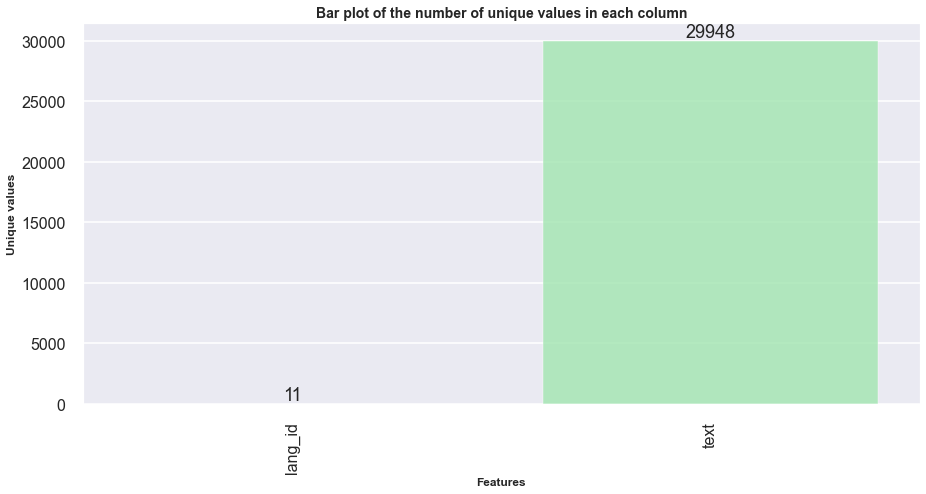

In [42]:
unique_train = pd.DataFrame()
unique_train['Features'] = df_train.columns
unique=[]
for i in df_train.columns:
    unique.append(df_train[i].nunique())
unique_train['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_train['Features'], y=unique_train['Uniques'], alpha=0.8)
for a in splot.patches:
    splot.annotate(format(a.get_height(), '.0f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot of the number of unique values in each column',weight='bold', size=14)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##### test_visual

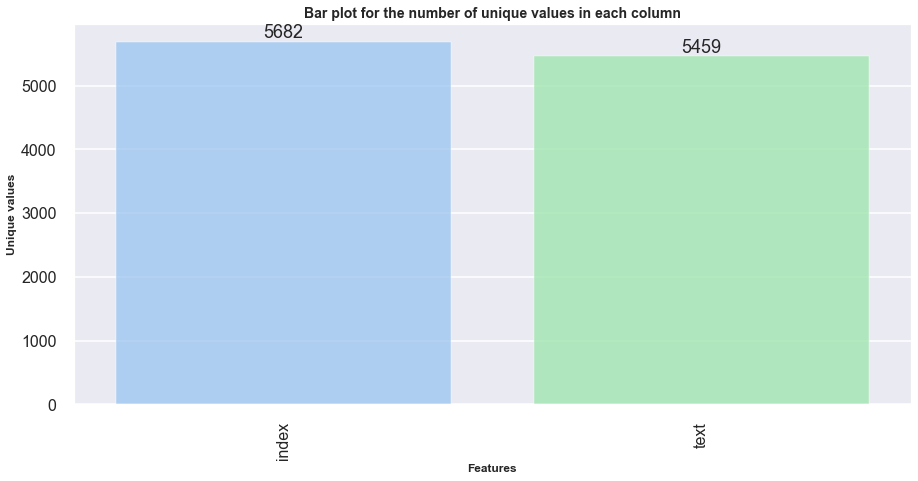

In [43]:
unique_test = pd.DataFrame()
unique_test['Features'] = df_test.columns
unique=[]
for i in df_test.columns:
    unique.append(df_test[i].nunique())
unique_test['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_test['Features'], y=unique_test['Uniques'], alpha=0.8)
for a in splot.patches:
    splot.annotate(format(a.get_height(), '.0f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for the number of unique values in each column',weight='bold', size=14)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

#### Visualizing the target variable distribution using a sentiment countplot

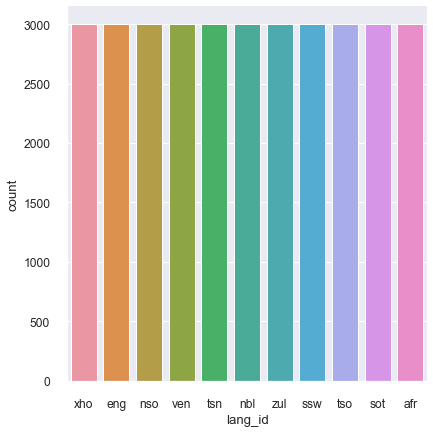

In [44]:
sns.set(font_scale=1.1)
sns.catplot("lang_id", data=df_train, kind="count", height=6)

<a id="three"></a>
## 4. Pre-Processing

The objective of the these steps are to ensure that the data inputed into the model is in the most useful form. This is important so we can extract maximum information. To this, we will be:

- Removing punctuation from each sentence in the predictor variable.
- Retaining only alphabetic words i.e. exclude numbers and alphanumeric letters.
- Removing of common English stop words.
- Eliminating all one-lettered words eg a, i etc
- Converting all of the words to lower case for consistency.

In [45]:
def clean_text(text):
    # replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
    
    #Removal of numbers
    text = re.sub(r'\d+', ' ', text)
    
    # will replace newline with space
    text = re.sub("\n"," ",text)
    
    # will convert to lower case
    text = text.lower()
    
    # will split and join the words
    text=' '.join(text.split())
    
    return text

In [46]:
# Application of the function to clean the texts
df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)

In [47]:
# Replace '.txt' with 'text file'
df_train["clean_text"] = df_train["clean_text"].str.replace(".txt", " text file")
df_test["clean_text"] = df_test["clean_text"].str.replace(".txt", " text file")

In [48]:
df_train.head(10)

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,fa le dirisiwa lebone le tshwanetse go bontsha...


In [49]:
df_test.head(10)

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee...","ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...,( am) final gems birthing options_zulu text file
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...,ntjhafatso ya konteraka ya mosebetsi: etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...,u-gems uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused.","so, on occasion, are statistics misused."


In [50]:
# Defining the features as well as the label
X = df_train['clean_text']
y = df_train['lang_id']  

<a id="three"></a>
## 5. Modelling
---

In [51]:
# Vectorize X-variable
X_vec = vect.fit_transform(X)

#### Splitting Our Dataset into Training And Testing Dataset

In [52]:
# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

#### Creating pipelines and building models

In [53]:
classifiers = [LinearSVC(random_state=42),
                DecisionTreeClassifier(),
               LogisticRegression(random_state=42,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1e5,
                                  max_iter=4000),
               KNeighborsClassifier(n_neighbors=5),
               MultinomialNB(),
                  ComplementNB()
               
                ]


In [54]:
names = ['LinearSupportVector Classifier', 'DecisionTree Classifier',
         'Logistic Regression','KNeighbors Classifier','multinomial Naive Bayes','Complement Naive Bayes']

In [55]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting LinearSupportVector Classifier model...
... predicting
... scoring
Fitting DecisionTree Classifier model...
... predicting
... scoring
Fitting Logistic Regression model...
... predicting
... scoring
Fitting KNeighbors Classifier model...
... predicting
... scoring
Fitting multinomial Naive Bayes model...
... predicting
... scoring
Fitting Complement Naive Bayes model...
... predicting
... scoring
... All done!


#### Result

In [56]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
LinearSupportVector Classifier,1.000000,1.000000,1.000000,1.000000,0.996513,1.542944
DecisionTree Classifier,1.000000,1.000000,1.000000,1.000000,0.945539,17.871673
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.996514,45.935337
multinomial Naive Bayes,0.999773,0.999773,0.999773,0.999773,0.998030,0.312211
Complement Naive Bayes,0.999470,0.999472,0.999470,0.999470,0.997272,0.334957
KNeighbors Classifier,0.978144,0.978274,0.978144,0.978013,0.959345,0.069563


#### Getting a better view with visuals

<AxesSubplot:xlabel='Classifier'>

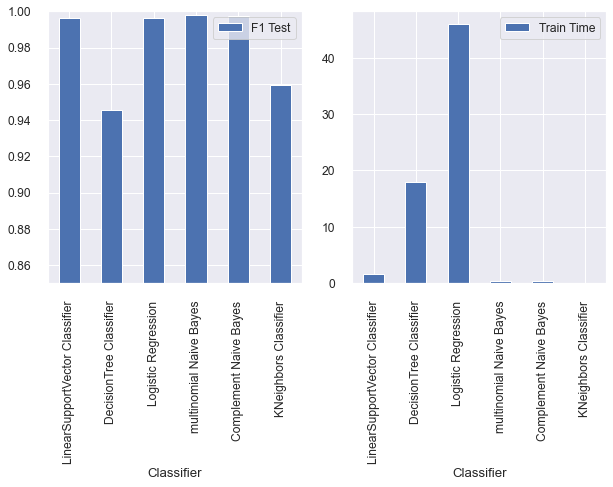

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

#### Now viewing the classification report of the various models:

In [59]:
print('LinearSupportVector Classification Report')
print(class_report['LinearSupportVector Classifier'])
print('            ------------------------------')
print('DecisionTree Classification Report')
print(class_report['DecisionTree Classifier'])
print('            ------------------------------')
print('Logistic Regression Classification Report')
print(class_report['Logistic Regression'])
print('            ------------------------------')
print('KNeighbors Classification Report')
print(class_report['KNeighbors Classifier'])
print('            ------------------------------')
print('multinomial Naive Bayes Classification Report')
print(class_report['multinomial Naive Bayes'])
print('            ------------------------------')
print('Complement Naive Bayes Classification Report')
print(class_report['Complement Naive Bayes'])
print('            ------------------------------')


LinearSupportVector Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00      2417
         eng       1.00      1.00      1.00      2385
         nbl       1.00      1.00      1.00      2417
         nso       1.00      1.00      1.00      2375
         sot       1.00      1.00      1.00      2382
         ssw       1.00      1.00      1.00      2416
         tsn       1.00      1.00      1.00      2402
         tso       1.00      1.00      1.00      2439
         ven       1.00      1.00      1.00      2366
         xho       1.00      1.00      1.00      2391
         zul       1.00      1.00      1.00      2410

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400

            ------------------------------
DecisionTree Classification Report
              precision    recall  f1-score   support

         afr

#### Making Predictions with the Multinomial Naive Bayes

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01)

In [63]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

tuned = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(1, 2))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])


# Fitting the model
tuned.fit(X_train, y_train)  


# predicting the fit on validation set
y_pred_mnb = tuned.predict(X_val) 


print(classification_report(y_val, y_pred_mnb))


              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        35
         eng       1.00      1.00      1.00        25
         nbl       1.00      1.00      1.00        31
         nso       1.00      1.00      1.00        31
         sot       1.00      1.00      1.00        24
         ssw       1.00      1.00      1.00        24
         tsn       1.00      1.00      1.00        28
         tso       1.00      1.00      1.00        34
         ven       1.00      1.00      1.00        39
         xho       1.00      1.00      1.00        29
         zul       1.00      1.00      1.00        30

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [64]:
submission_traintest = pd.DataFrame(df_test['index'])
submission_traintest['lang_id'] = tuned.predict(df_test['text'])
submission_traintest.to_csv('Oluwaleke_Oni_Classification_Hackathon.csv', index=False)

<a id="three"></a>
## 6. Model Evaluation and Conclusions
---

From the metrics we have above, it is clear that the two 'Naive Bayes' models outperforms the other four(4) models. 

While the 'Naive Bayes' and 'Logistic Regression' models recorded very similar F1-train and F1-test scores (with the 'Naive Bayes' slighlty outperfomring Logistic Regression'), the 'Naive Bayes' have a considerably lower training time than 'Logistic Regression'. 

Similarly to the above mentioned metrics, the accuracy of the 'Naive Bayes' once again outperforms the other four models. 

##### I decided to go with the Multinomal Naive Bayes to make my predictions